# **Step 1: Connect to Google Drive and Load the Dataset**

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the dataset
file_path = '/content/drive/My Drive/Pakistan Largest Ecommerce Dataset.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Display the dataset as a table
print("First 10 rows of the dataset:")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
print(df.head(10))  # Display the first 10 rows

# Display dataset info
print("\nDataset Info:")
print(df.info())

print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')


Mounted at /content/drive
First 10 rows of the dataset:
    item_id          status created_at                                                sku    price  qty_ordered  grand_total increment_id    category_name_1 sales_commission_code  discount_amount payment_method Working Date BI Status       MV     Year  Month Customer Since     M-Y    FY  Customer ID  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25
0  211131.0        complete   7/1/2016                                  kreations_YI 06-L   1950.0          1.0       1950.0    100147443    Women's Fashion                    \N              0.0            cod     7/1/2016     #REF!    1,950   2016.0    7.0         2016-7  7-2016  FY17          1.0          NaN          NaN          NaN          NaN          NaN
1  211133.0        canceled   7/1/2016  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...    240.0          1.0        240.0    100147444  Beauty & Grooming                    \N              0.0            cod  

# **Step 2: Data Cleaning**
**Check for Missing Values,Check for Duplicates,Handle Missing Data,Fix Data Types**


Check for Missing Values:Identify missing values and calculate their percentages.

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values and percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Reset the index to display column names as a separate column
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Column Name'}, inplace=True)

# Display the cleaned missing data table
print("Missing Values and Percentages:")
print(missing_data)


Missing Values and Percentages:
              Column Name  Missing Values  Percentage Missing (%)
0             Unnamed: 25         1048575              100.000000
1             Unnamed: 24         1048575              100.000000
2             Unnamed: 23         1048575              100.000000
3             Unnamed: 22         1048575              100.000000
4             Unnamed: 21         1048575              100.000000
5   sales_commission_code          601229               57.337720
6         category_name_1          464215               44.271034
7                     sku          464071               44.257302
8                  status          464066               44.256825
9             Customer ID          464062               44.256443
10         Customer Since          464062               44.256443
11                   Year          464051               44.255394
12                     FY          464051               44.255394
13                    M-Y          464051   

Drop Unnecessary Columns :Remove columns with 100% missing values or redundant information.

In [4]:
# Drop columns with 100% missing values
# These columns (Unnamed: 25, Unnamed: 24, Unnamed: 23, Unnamed: 22, Unnamed: 21) have no data and are completely empty.
columns_to_drop = ['Unnamed: 25', 'Unnamed: 24', 'Unnamed: 23', 'Unnamed: 22', 'Unnamed: 21']
df.drop(columns=columns_to_drop, inplace=True)

# Drop the 'sales_commission_code' column
# This column has more than 50% missing values (57.33%), and its removal will not significantly affect the dataset.
df.drop(columns=['sales_commission_code'], inplace=True)

# Drop the 'M-Y' column
# The 'M-Y' column contains combined month-year information, which is already represented by the 'Customer Since', 'Year', and 'Month' columns.
df.drop(columns=['M-Y'], inplace=True)

# Verify the changes
print("Columns dropped successfully.")
print(f"Updated Number of Columns: {df.shape[1]}")
print("Remaining Columns:")
print(df.columns.tolist())


Columns dropped successfully.
Updated Number of Columns: 19
Remaining Columns:
['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id', 'category_name_1', 'discount_amount', 'payment_method', 'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since', 'FY', 'Customer ID']


Remove Empty Rows:Eliminate rows where all values are missing.

In [5]:
# Drop rows where all values are missing
# These rows provide no information and can be safely removed.
empty_rows_count = df[df.isnull().all(axis=1)].shape[0]  # Count completely empty rows
df.dropna(how='all', inplace=True)

# Verify the changes
print(f"Number of completely empty rows removed: {empty_rows_count}")
print(f"Updated Number of Rows: {df.shape[0]}")


Number of completely empty rows removed: 464051
Updated Number of Rows: 584524


Check for and Remove Duplicate Rows:Identify and remove duplicate rows to avoid redundancy.

In [6]:
# Check for duplicate rows
# Duplicate rows repeat the same information and can be removed to avoid redundancy.
duplicate_rows_count = df.duplicated().sum()  # Count duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# Verify the changes
print(f"Number of duplicate rows removed: {duplicate_rows_count}")
print(f"Updated Number of Rows: {df.shape[0]}")


Number of duplicate rows removed: 0
Updated Number of Rows: 584524


Recheck for Missing Values:Verify if there are any remaining missing values after cleaning.

In [7]:
# Check for missing values in each column
# This will help identify if there are still missing values after cleaning.
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values and percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Reset the index to display column names as a separate column
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Column Name'}, inplace=True)

# Display the cleaned missing data table
print("Missing Values and Percentages:")
print(missing_data)


Missing Values and Percentages:
        Column Name  Missing Values  Percentage Missing (%)
0   category_name_1             164                0.028057
1               sku              20                0.003422
2            status              15                0.002566
3       Customer ID              11                0.001882
4    Customer Since              11                0.001882
5      Working Date               0                0.000000
6                FY               0                0.000000
7             Month               0                0.000000
8              Year               0                0.000000
9               MV                0                0.000000
10        BI Status               0                0.000000
11          item_id               0                0.000000
12   payment_method               0                0.000000
13     increment_id               0                0.000000
14      grand_total               0                0.000000
15      

Fill Missing Values Using Mode:
* Replace missing values in specific columns with their most frequent value (mode).
*  Verify if all missing values have been filled.




In [8]:
# Fill missing values with the mode (most frequent value) for each column
columns_to_fill = ['category_name_1', 'sku', 'status', 'Customer ID', 'Customer Since']

for col in columns_to_fill:
    mode_value = df[col].mode()[0]  # Get the mode of the column
    df[col].fillna(mode_value, inplace=True)  # Replace missing values with the mode

# Verify if there are still missing values
print("\nMissing Values After Filling with Mode:")
print(df.isnull().sum())



Missing Values After Filling with Mode:
item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
increment_id       0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
BI Status          0
 MV                0
Year               0
Month              0
Customer Since     0
FY                 0
Customer ID        0
dtype: int64


Rename Columns for Clarity:
*  Rename columns using a dictionary to ensure clarity and consistency in naming conventions.
*  Verify updated column names to confirm changes.



In [9]:
# Define renaming dictionary
column_renames = {
    'status': 'order_status',
    'created_at': 'order_date',
    'sku': 'stock_keeping_unit',
    'qty_ordered': 'quantity_ordered',
    'increment_id': 'order_increment_id',
    'category_name_1': 'category_name',
    'Working Date': 'working_date',
    'BI Status': 'bi_status',
    ' MV ': 'market_value',
    'Customer Since': 'customer_since',
    'FY': 'fiscal_year',
    'Customer ID': 'customer_id',
     'Year': 'year',
    'Month': 'month'
}

# Rename columns
df.rename(columns=column_renames, inplace=True)

# Verify updated column names
print("Updated Column Names:")
print(df.columns.tolist())


Updated Column Names:
['item_id', 'order_status', 'order_date', 'stock_keeping_unit', 'price', 'quantity_ordered', 'grand_total', 'order_increment_id', 'category_name', 'discount_amount', 'payment_method', 'working_date', 'bi_status', 'market_value', 'year', 'month', 'customer_since', 'fiscal_year', 'customer_id']


Adjust Data Types

In [10]:
# Adjust data types based on the provided information

# Correct numeric columns
df['quantity_ordered'] = df['quantity_ordered'].astype('int64')  # Convert to integer
df['year'] = df['year'].astype('int64')  # Convert to integer
df['month'] = df['month'].astype('int64')  # Convert to integer
df['customer_id'] = df['customer_id'].astype('str')  # Convert to string (IDs should not be treated as numbers)

# Convert date columns to datetime
date_columns = ['order_date', 'working_date', 'customer_since']
for col in date_columns:
    if col in df.columns:  # Ensure column exists before converting
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle invalid formats

# Verify updated data types
print("\nUpdated Data Types:")
print(df.dtypes)



Updated Data Types:
item_id                      float64
order_status                  object
order_date            datetime64[ns]
stock_keeping_unit            object
price                        float64
quantity_ordered               int64
grand_total                  float64
order_increment_id            object
category_name                 object
discount_amount              float64
payment_method                object
working_date          datetime64[ns]
bi_status                     object
market_value                  object
year                           int64
month                          int64
customer_since        datetime64[ns]
fiscal_year                   object
customer_id                   object
dtype: object


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   item_id             584524 non-null  float64       
 1   order_status        584524 non-null  object        
 2   order_date          584524 non-null  datetime64[ns]
 3   stock_keeping_unit  584524 non-null  object        
 4   price               584524 non-null  float64       
 5   quantity_ordered    584524 non-null  int64         
 6   grand_total         584524 non-null  float64       
 7   order_increment_id  584524 non-null  object        
 8   category_name       584524 non-null  object        
 9   discount_amount     584524 non-null  float64       
 10  payment_method      584524 non-null  object        
 11  working_date        584524 non-null  datetime64[ns]
 12  bi_status           584524 non-null  object        
 13  market_value        584524 non-nul

Validate Categorical and Date Columns

In [12]:
# Check unique values in categorical columns to identify inconsistencies or anomalies.
print("\nUnique Values in Categorical Columns:")
categorical_columns = ['payment_method', 'category_name', 'bi_status', 'stock_keeping_unit']
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

# Validate date columns to ensure logical consistency (e.g., customer_since should not be later than order_date).
invalid_dates = df[df['customer_since'] > df['order_date']]
print(f"Number of rows with invalid 'customer_since' dates: {len(invalid_dates)}")





Unique Values in Categorical Columns:
payment_method: ['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg']
category_name: ["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Mobiles & Tablets'
 'Appliances' 'Home & Living' "Men's Fashion" 'Kids & Baby' '\\N' 'Others'
 'Entertainment' 'Computing' 'Superstore' 'Health & Sports' 'Books'
 'School & Education']
bi_status: ['#REF!' 'Gross' 'Net' 'Valid']
stock_keeping_unit: ['kreations_YI 06-L'
 'kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free'
 'Ego_UP0017-999-MR0' ... 'WOFVAL59D5EA84167F9-M' 'WOFNIG5B4D7EB0E9FDD-L'
 'WOFSCE5AE00357AECDE']
Number of rows with invalid 'customer_since' dates: 0


Clean Invalid Values in Categorical Columns

In [13]:
import numpy as np
# Columns to clean
columns_to_clean = ['order_status', 'payment_method', 'category_name', 'bi_status']

# Replace invalid placeholders like \N and #REF! with NaN for better consistency.
invalid_values = ['\\N', '#REF!']
for col in columns_to_clean:
    df[col] = df[col].replace(invalid_values, np.nan)

# Verify unique values in the cleaned columns to confirm successful replacements.
for col in columns_to_clean:
    print(f"Unique values in '{col}' after cleaning:")
    print(df[col].unique())

Unique values in 'order_status' after cleaning:
['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' nan 'cod' 'pending'
 'processing' 'payment_review']
Unique values in 'payment_method' after cleaning:
['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg']
Unique values in 'category_name' after cleaning:
["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Mobiles & Tablets'
 'Appliances' 'Home & Living' "Men's Fashion" 'Kids & Baby' nan 'Others'
 'Entertainment' 'Computing' 'Superstore' 'Health & Sports' 'Books'
 'School & Education']
Unique values in 'bi_status' after cleaning:
[nan 'Gross' 'Net' 'Valid']


## **EDA**


1. Heatmap of Order Status and Payment Method
- Understand how payment methods relate to different order statuses.

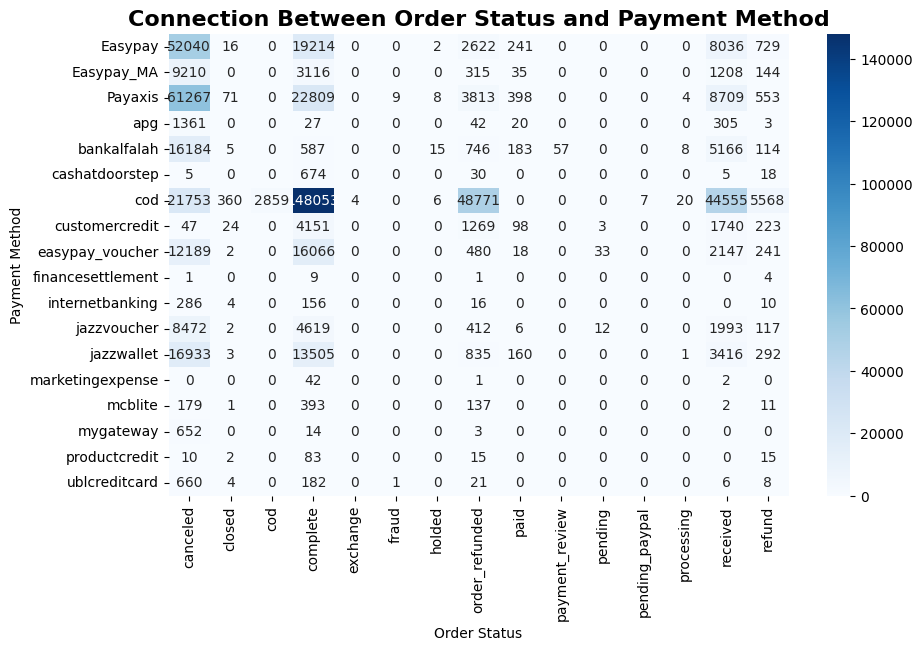

In [23]:
# Create a pivot table
payment_status_pivot = df.pivot_table(index='payment_method', columns='order_status', aggfunc='size', fill_value=0)

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(payment_status_pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Connection Between Order Status and Payment Method', fontsize=16, fontweight='bold')
plt.ylabel('Payment Method')
plt.xlabel('Order Status')
plt.show()


2. Total Sales by Category (Bar Chart)
- Identify the most profitable categories and their total revenue.

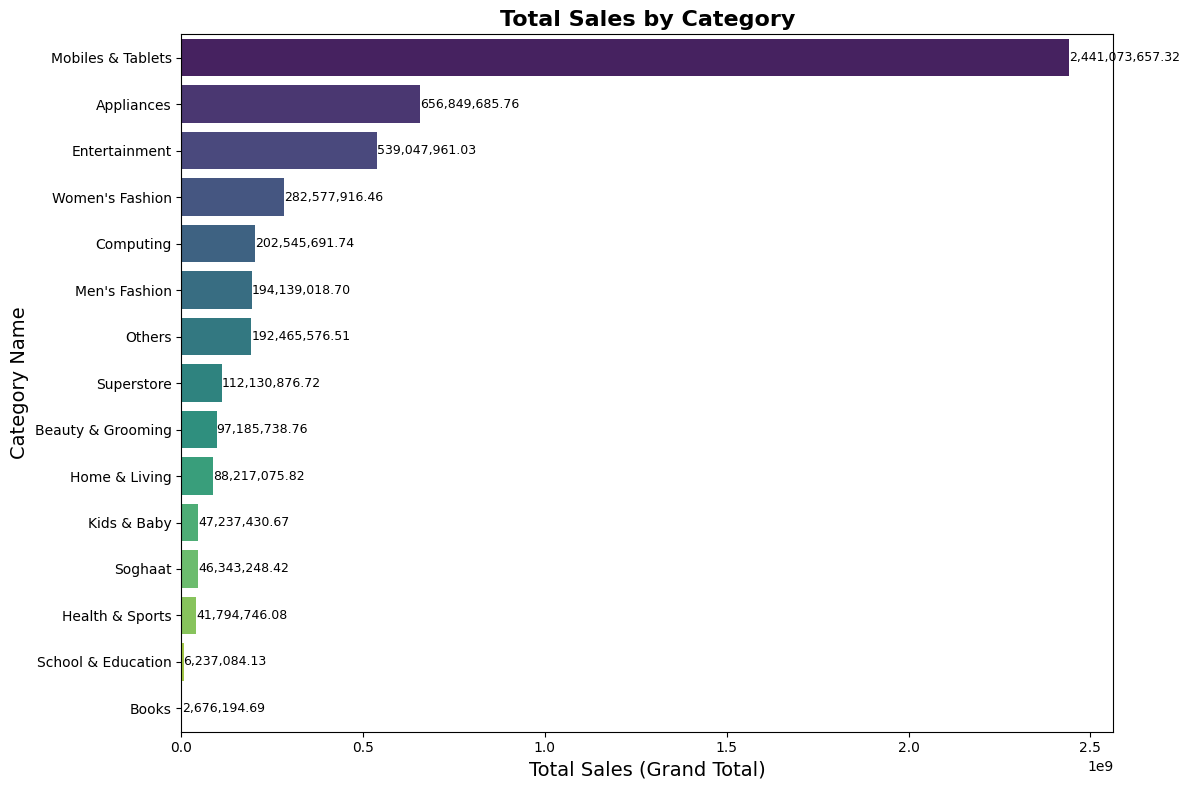

In [24]:
# Group by category_name and sum the grand_total
category_sales = df.groupby('category_name')['grand_total'].sum().reset_index()

# Sort categories by grand_total
category_sales = category_sales.sort_values(by='grand_total', ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='grand_total', y='category_name', data=category_sales, palette='viridis')

# Add labels to bars
for index, value in enumerate(category_sales['grand_total']):
    plt.text(value, index, f'{value:,.2f}', va='center', ha='left', fontsize=9, color='black')

plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales (Grand Total)', fontsize=14)
plt.ylabel('Category Name', fontsize=14)
plt.tight_layout()
plt.show()


3.First Chart: "Quantity Ordered by All Categories Over Time"
- Provides a complete overview of category trends across months.

Second Chart: "Quantity Ordered by Top 5 Categories Over Time"
-  Highlights trends for the most popular categories, making it easier to focus on key performers.



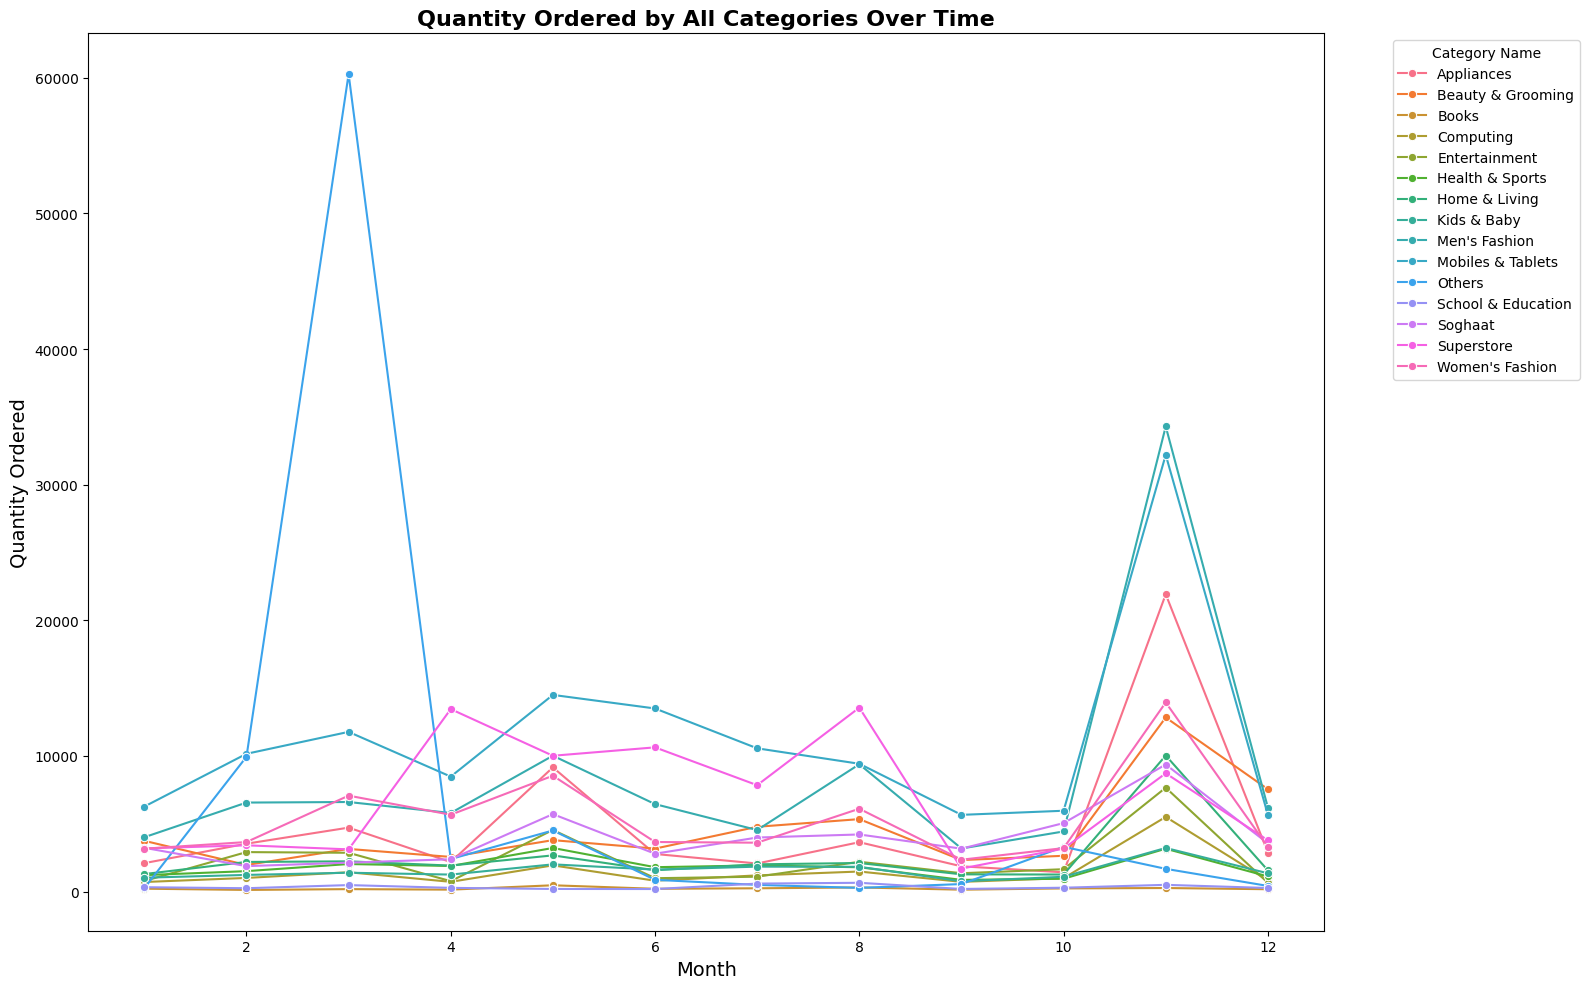

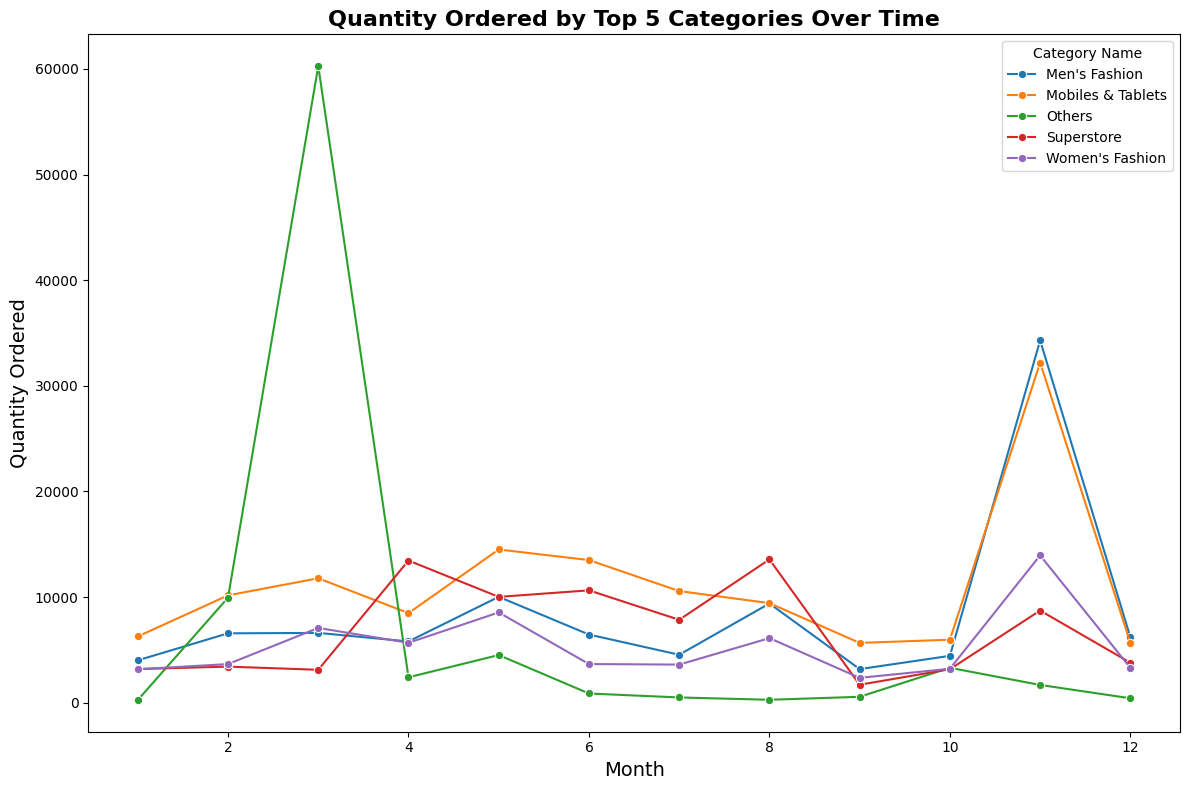

In [29]:

# Group by category and month for all categories
all_categories_trends = df.groupby(['category_name', 'month'])['quantity_ordered'].sum().reset_index()

# Line plot for all categories
plt.figure(figsize=(16, 10))
sns.lineplot(data=all_categories_trends, x='month', y='quantity_ordered', hue='category_name', marker='o')

plt.title('Quantity Ordered by All Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Quantity Ordered', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Extract top 5 categories by total quantity ordered
top_5_categories = df.groupby('category_name')['quantity_ordered'].sum().nlargest(5).index

# Filter data for top 5 categories
top_5_categories_data = df[df['category_name'].isin(top_5_categories)]

# Group by category and month for top 5 categories
top_5_categories_trends = top_5_categories_data.groupby(['category_name', 'month'])['quantity_ordered'].sum().reset_index()

# Line plot for top 5 categories
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_categories_trends, x='month', y='quantity_ordered', hue='category_name', marker='o')

plt.title('Quantity Ordered by Top 5 Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Quantity Ordered', fontsize=14)
plt.legend(title='Category Name')
plt.tight_layout()
plt.show()


4. Grand Total vs Market Value Scatter Plot
- Analyze pricing strategies and outliers where market_value exceeds grand_total.

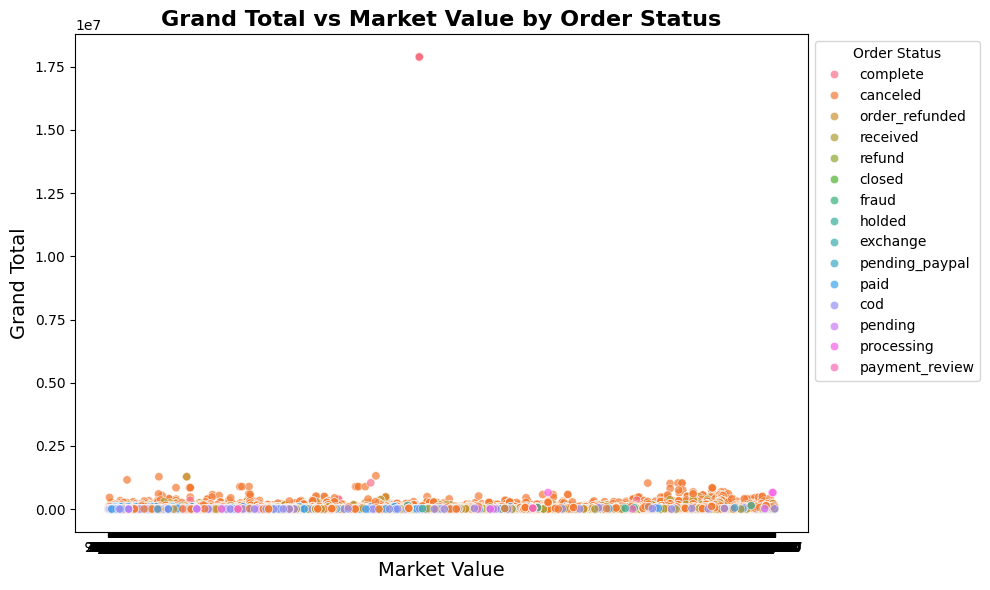

In [28]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='market_value', y='grand_total', hue='order_status', alpha=0.7)

plt.title('Grand Total vs Market Value by Order Status', fontsize=16, fontweight='bold')
plt.xlabel('Market Value', fontsize=14)
plt.ylabel('Grand Total', fontsize=14)
plt.legend(title='Order Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


5. Top 10 Customers by Total Orders
- Identify loyal customers contributing most to the business.

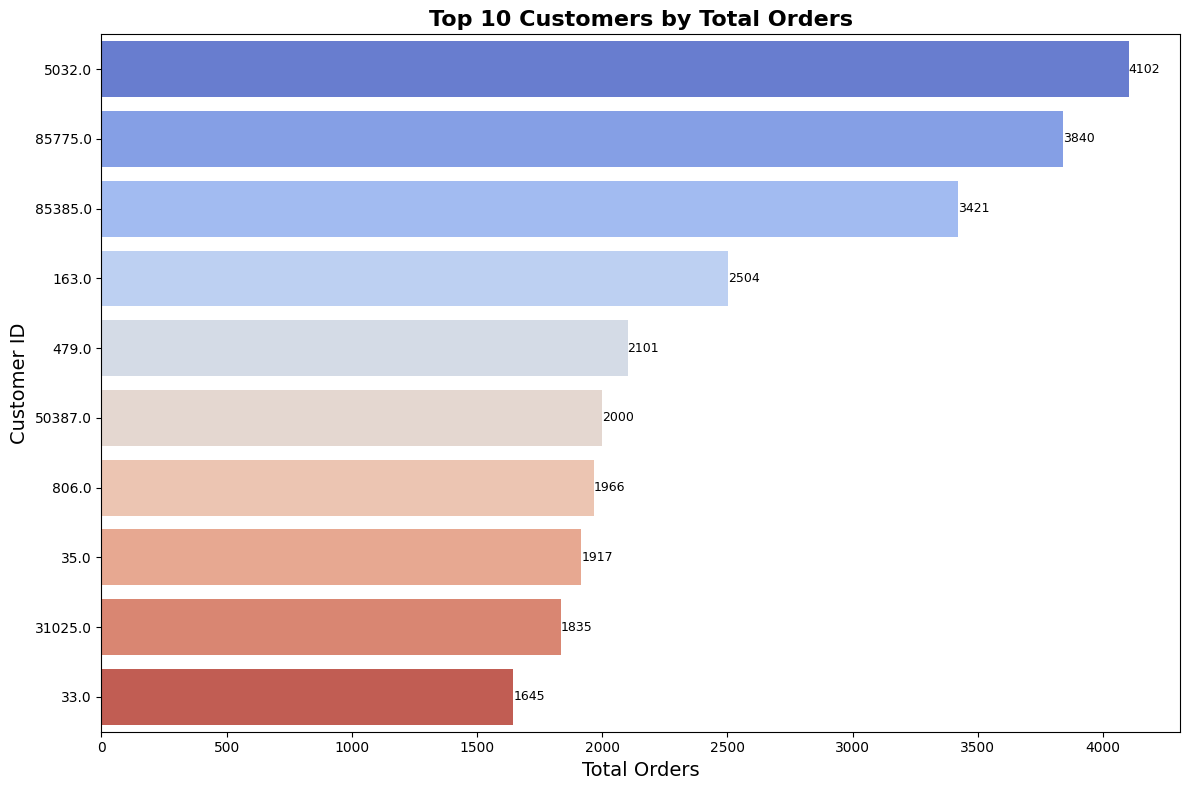

In [35]:

# Top customers by total orders
top_customers = df.groupby('customer_id')['quantity_ordered'].sum().nlargest(10).reset_index()

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_customers, x='quantity_ordered', y='customer_id', palette='coolwarm')

# Add labels
for index, value in enumerate(top_customers['quantity_ordered']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=9, color='black')

plt.title('Top 10 Customers by Total Orders', fontsize=16, fontweight='bold')
plt.xlabel('Total Orders', fontsize=14)
plt.ylabel('Customer ID', fontsize=14)
plt.tight_layout()
plt.show()


Relationship Between Discount and Quantity Ordered
This chart will visualize how discounts impact the quantity of orders.

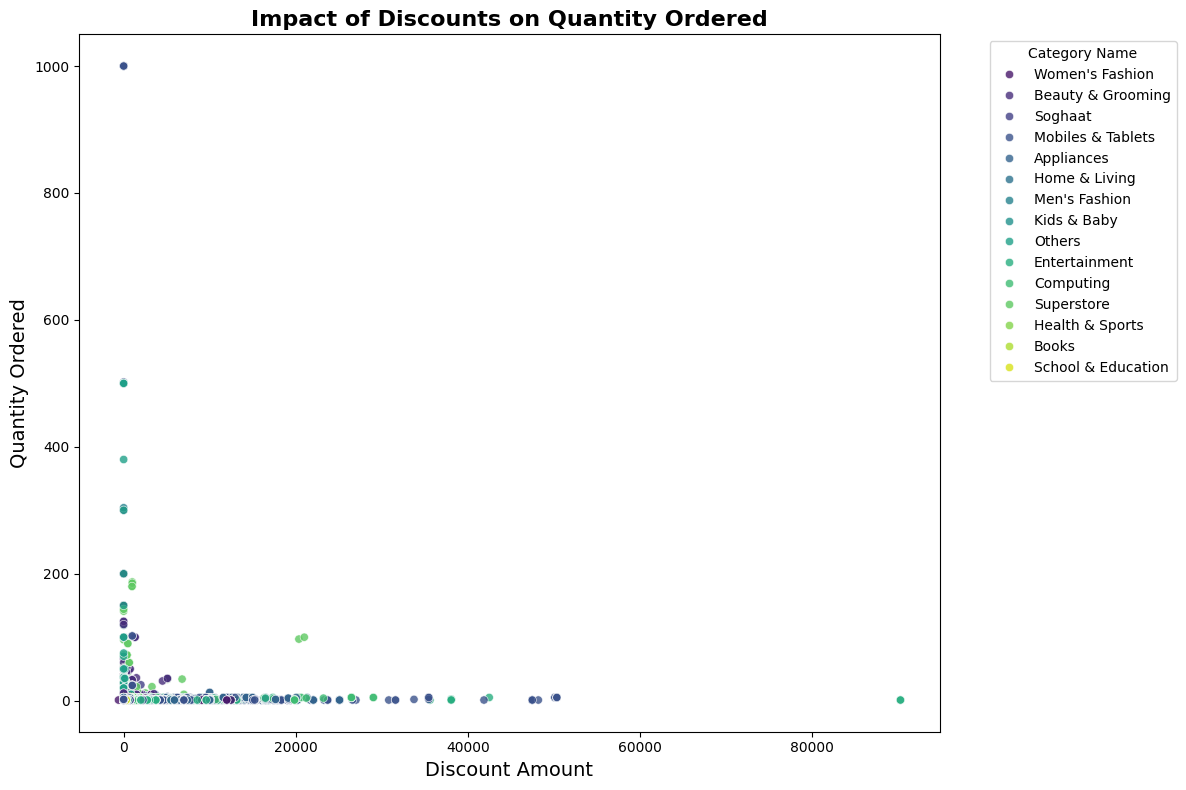

In [37]:
# Scatter plot: Discount Amount vs Quantity Ordered
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='discount_amount', y='quantity_ordered', hue='category_name', palette='viridis', alpha=0.8)

# Customize chart
plt.title('Impact of Discounts on Quantity Ordered', fontsize=16, fontweight='bold')
plt.xlabel('Discount Amount', fontsize=14)
plt.ylabel('Quantity Ordered', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
